<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [6]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2023-05-03 09:44:19--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: './datasets/facades.tar.gz'

./datasets/facades. 100%[===================>]  28.77M  1.73MB/s    in 25s     

2023-05-03 09:44:44 (1.13 MB/s) - './datasets/facades.tar.gz' saved [30168306/30168306]

x facades/
x facades/test/
x facades/test/27.jpg
x facades/test/5.jpg
x facades/test/72.jpg
x facades/test/1.jpg
x facades/test/10.jpg
x facades/test/100.jpg
x facades/test/101.jpg
x facades/test/102.jpg
x facades/test/103.jpg
x facades/test/104.jpg
x facades/test/105.jpg
x facades/test/106.jpg
x facades/test/11.jpg
x facades/test/12.jpg
x facades/test/13.jpg
x facades/test/14.jp

x facades/train/93.jpg
x facades/train/94.jpg
x facades/train/95.jpg
x facades/train/96.jpg
x facades/train/97.jpg
x facades/train/98.jpg
x facades/train/99.jpg
x facades/train/128.jpg
x facades/train/129.jpg
x facades/train/13.jpg
x facades/train/130.jpg
x facades/train/131.jpg
x facades/train/132.jpg
x facades/train/133.jpg
x facades/train/134.jpg
x facades/train/135.jpg
x facades/train/136.jpg
x facades/train/137.jpg
x facades/train/138.jpg
x facades/train/139.jpg
x facades/train/14.jpg
x facades/train/140.jpg
x facades/train/141.jpg
x facades/train/142.jpg
x facades/train/143.jpg
x facades/train/144.jpg
x facades/train/145.jpg
x facades/train/146.jpg
x facades/train/147.jpg
x facades/train/148.jpg
x facades/train/149.jpg
x facades/train/15.jpg
x facades/train/150.jpg
x facades/train/151.jpg
x facades/train/152.jpg
x facades/train/153.jpg
x facades/train/154.jpg
x facades/train/191.jpg
x facades/train/192.jpg
x facades/train/193.jpg
x facades/train/194.jpg
x facades/train/195.jpg
x 

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]

In [2]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2023-05-03 09:34:51--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: './checkpoints/facades_label2photo_pretrained/latest_net_G.pth'

./checkpoints/facad 100%[===================>] 207.62M  35.2MB/s    in 6.7s    

2023-05-03 09:34:58 (31.2 MB/s) - './checkpoints/facades_label2photo_pretrained/latest_net_G.pth' saved [217704720/217704720]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --display_id -1

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [3]:
!ls checkpoints/

facades_label2photo_pretrained monet2photo_pretrained


In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --gpu_ids -1 --model pix2pix --name facades_label2photo_pretrained --use_wandb

# Visualize

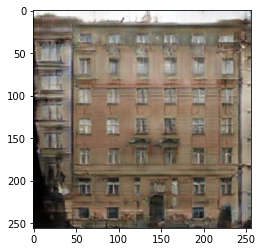

In [13]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/1_fake_B.png')
plt.imshow(img)

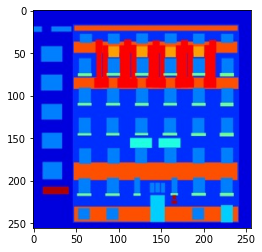

In [12]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/1_real_A.png')
plt.imshow(img)

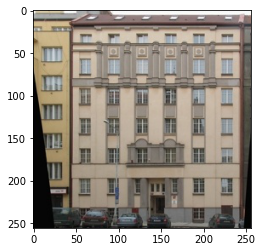

In [11]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/1_real_B.png')
plt.imshow(img)

In [15]:
import torch
import cv2
_ = torch.manual_seed(123)
from torchmetrics.image.inception import InceptionScore
inception = InceptionScore()
 # generate some images
img_list=[]
for i in os.listdir('results/facades_label2photo_pretrained/test_latest/results_fake_pix2pix'):
    img=plt.imread('results/facades_label2photo_pretrained/test_latest/results_fake_pix2pix/'+i)
    img=cv2.resize(img, (299,299), interpolation = cv2.INTER_CUBIC)
    img_list.append(img)
    
import numpy as np

m=len(img_list)

imgs=np.array(img_list)


print(imgs.shape)

imgs=(imgs*255).astype('uint8')

print(imgs)

imgs=imgs.reshape((50,3,299,299))
imgs=torch.from_numpy(imgs)

print(imgs.type)

inception.update(imgs)
inception.compute()

/Users/pallabichandra/opt/anaconda3/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


(50, 299, 299, 3)
[[[[203 192 191]
   [200 195 196]
   [206 204 205]
   ...
   [126 120 121]
   [126 121 118]
   [127 122 117]]

  [[216 210 205]
   [214 207 205]
   [211 205 207]
   ...
   [127 125 123]
   [124 122 118]
   [120 119 118]]

  [[226 222 215]
   [225 217 212]
   [227 222 220]
   ...
   [129 127 126]
   [128 126 122]
   [125 118 121]]

  ...

  [[130 123 116]
   [133 129 123]
   [132 131 128]
   ...
   [130 126 121]
   [131 127 121]
   [123 124 120]]

  [[134 126 119]
   [134 129 122]
   [139 133 129]
   ...
   [122 117 112]
   [117 113 106]
   [105 105 104]]

  [[141 127 114]
   [141 133 124]
   [142 135 131]
   ...
   [118 117 105]
   [107 105  96]
   [ 95  95  95]]]


 [[[249 248 248]
   [251 251 251]
   [252 252 252]
   ...
   [113 115 118]
   [112 113 114]
   [112 116 113]]

  [[251 251 251]
   [252 252 252]
   [252 252 252]
   ...
   [115 123 129]
   [111 118 122]
   [105 113 117]]

  [[251 250 250]
   [252 252 252]
   [250 250 251]
   ...
   [118 126 136]
   [115 12

(tensor(1.3475), tensor(0.2886))